In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

KeyError: 'pl_name'


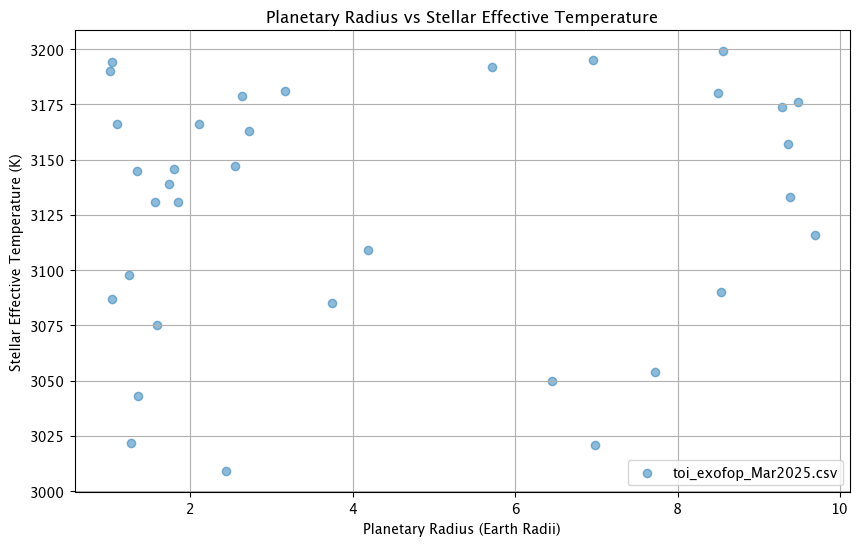

KeyError: 'pl_name'


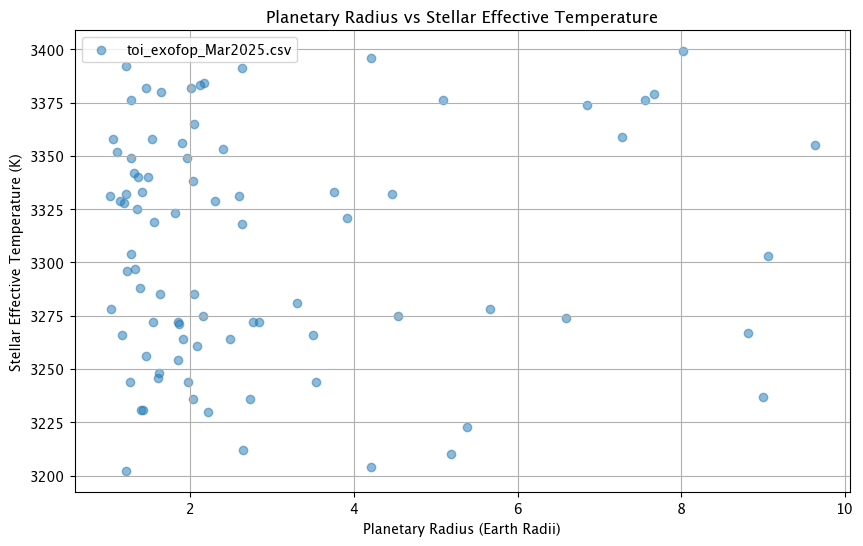

≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.
lower p value, more different

File 1: toi_exofop_Mar2025.csv Teff 3000 - 3200 K
File 2: toi_exofop_Mar2025.csv Teff 3200 - 3400 K

KS Statistic for 'pl_rade': 0.26330532212885155, P-value: 0.055982823431365514
KS Statistic for 'st_teff': 1.0, P-value: 0.0


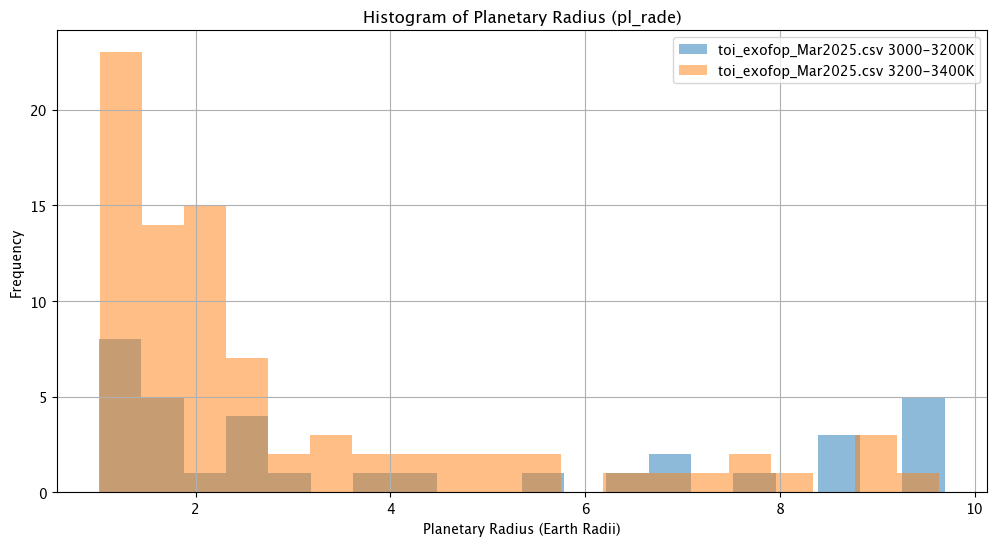

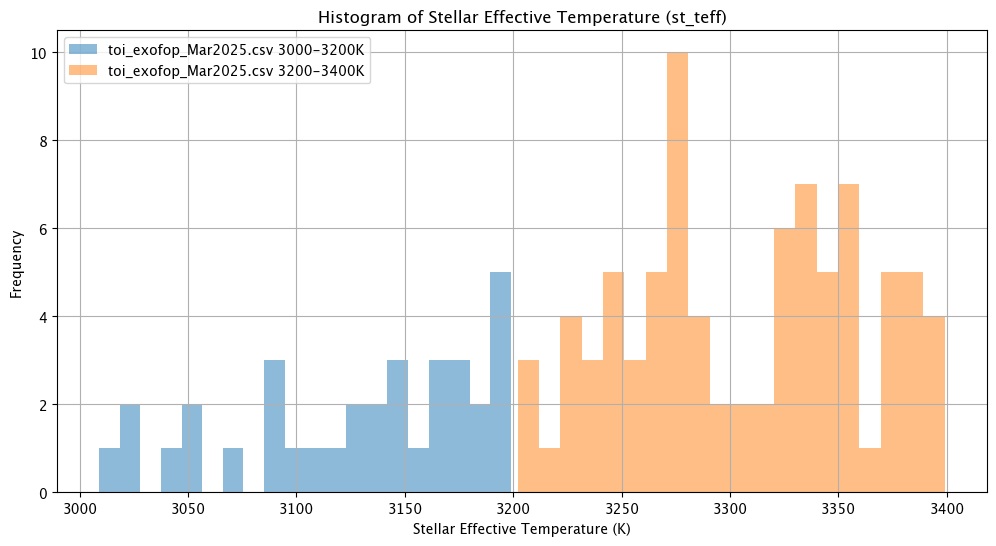

In [39]:
 def prepare_data_for_ks_test_single(file, skip, teff_min, teff_max, rad_min, rad_max):
    df_combined = pd.DataFrame()
    plt.figure(figsize=(10, 6))

    df = pd.read_csv(file, skiprows=skip)

    if 'Stellar Eff Temp (K)' in df.columns:
        df.rename(columns={'Stellar Eff Temp (K)': 'st_teff'}, inplace=True)
    if 'Planet Radius (R_Earth)' in df.columns:
        df.rename(columns={'Planet Radius (R_Earth)': 'pl_rade'}, inplace=True)
    #print(df.columns)

    df = df.dropna(subset=['st_teff', 'pl_rade'])
    df = df[(df['st_teff'] < teff_max) & (df['st_teff'] > teff_min)]
    df = df[(df['pl_rade'] < rad_max) & (df['pl_rade'] > rad_min)]

    if 'tfopwg_disp' in df.columns:
        df = df[df['tfopwg_disp'] != 'FP']

    df_combined = pd.concat([df_combined, df], ignore_index=True)

    plt.scatter(df['pl_rade'], df['st_teff'], alpha=0.5, label=file)
    if 'pl_name' in df.columns:
        for i, txt in enumerate(df['pl_name']):
            plt.annotate(txt, (df['pl_rade'].iloc[i], df['st_teff'].iloc[i]), fontsize=8, alpha=0.7)

    try:
        df_combined = df_combined[df_combined['pl_name'].isnull() | ~df_combined[df_combined['pl_name'].notnull()].duplicated(subset='pl_name', keep='first')]
    except KeyError as e:
        print(f"KeyError: {e}")

    df_combined.rename(columns={'tid': 'tic_id', 'TIC ID': 'tic_id'}, inplace=True)

    plt.title('Planetary Radius vs Stellar Effective Temperature')
    plt.ylabel('Stellar Effective Temperature (K)')
    plt.xlabel('Planetary Radius (Earth Radii)')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df_combined[['pl_rade', 'st_teff']]

def perform_ks_test(file1, skip1, file2, skip2, teff_min1=3000, teff_max1=3200, teff_min2=3200, teff_max2=3400, rad_min1=0, rad_max1=10, rad_min2=0, rad_max2=10):
   

    data_for_ks_test_1 = prepare_data_for_ks_test_single(file1, skip1, teff_min1, teff_max1, rad_min1, rad_max1)
    data_for_ks_test_2 = prepare_data_for_ks_test_single(file2, skip2 ,teff_min2, teff_max2, rad_min2, rad_max2)

    from scipy.stats import ks_2samp

    print('≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.\nlower p value, more different\n')


    print(f"File 1: {file1} Teff {teff_min1} - {teff_max1} K")
    print(f"File 2: {file2} Teff {teff_min2} - {teff_max2} K\n")


    # Perform KS test on 'pl_rade' column
    ks_statistic_rade, p_value_rade = ks_2samp(data_for_ks_test_1['pl_rade'], data_for_ks_test_2['pl_rade'])
    print(f"KS Statistic for 'pl_rade': {ks_statistic_rade}, P-value: {p_value_rade}")

    # Perform KS test on 'st_teff' column
    ks_statistic_teff, p_value_teff = ks_2samp(data_for_ks_test_1['st_teff'], data_for_ks_test_2['st_teff'])
    print(f"KS Statistic for 'st_teff': {ks_statistic_teff}, P-value: {p_value_teff}")


    # Plot histograms for 'pl_rade' column
    plt.figure(figsize=(12, 6))
    plt.hist(data_for_ks_test_1['pl_rade'], bins=20, alpha=0.5,  label=str(f'{file1} {teff_min1}-{teff_max1}K'))
    plt.hist(data_for_ks_test_2['pl_rade'], bins=20, alpha=0.5,  label=str(f'{file2} {teff_min2}-{teff_max2}K'))
    plt.title('Histogram of Planetary Radius (pl_rade)')
    plt.xlabel('Planetary Radius (Earth Radii)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


    # Plot histograms for 'st_teff' column
    plt.figure(figsize=(12, 6))
    plt.hist(data_for_ks_test_1['st_teff'], bins=20, alpha=0.5, label=str(f'{file1} {teff_min1}-{teff_max1}K'))
    plt.hist(data_for_ks_test_2['st_teff'], bins=20, alpha=0.5, label=str(f'{file2} {teff_min2}-{teff_max2}K'))
    plt.title('Histogram of Stellar Effective Temperature (st_teff)')
    plt.xlabel('Stellar Effective Temperature (K)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

teff_min1=3000
teff_max1=3200
teff_min2=3200
teff_max2=3400

rad_min1=1
rad_max1=10
rad_min2=1
rad_max2=10
#perform_ks_test('TESS_confirmed_Mar2025.csv', 104, 'TESS_confirmed_Mar2025.csv', 104, 3200, 3400, 3600, 3800)

perform_ks_test('toi_exofop_Mar2025.csv', 0, 'toi_exofop_Mar2025.csv', 0, teff_min1, teff_max1, teff_min2, teff_max2, rad_min1, rad_max1, rad_min2, rad_max2)


#P-value of .05 is 2sigma, so this means that the chance that the sample is the same is 95%... or 5%???
#remove smaller planets to remove bias to smaller stars